In [ ]:
# import libraries....

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# load datsets and preprocess it....

data = pd.read_csv("/content/diabetes.csv")
columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns] = data[columns].replace(0, np.NaN)
data = data.dropna()
data['Outcome'] = data['Outcome'].apply(lambda x: -1 if (x == 1) else 1)

#------------------------------------------------------------------------------     #Data dividing for tran, valid and test
ntrain = int(len(data)*0.85)
nvalid = int(len(data)*0.95)
#------------------------------------------------------------------------------     # train, validation and test data
Xtrain = data.iloc[:ntrain, 0:8].values
Xvalid = data.iloc[ntrain:nvalid, 0:8].values
Xtest = data.iloc[nvalid:, 0:8].values

Ytrain = data.iloc[:ntrain, 8:9].values
Yvalid = data.iloc[ntrain:nvalid, 8:9].values
Ytest = data.iloc[nvalid:, 8:9].values
#-------------------------------------------------------------------------------      # standardized data
scaler_xtrain = MinMaxScaler()
xtrain_sc = scaler_xtrain.fit_transform(Xtrain)

scaler_xvalid = MinMaxScaler()
xvalid_sc = scaler_xvalid.fit_transform(Xvalid)

scaler_xtest = MinMaxScaler()
xtest_sc = scaler_xtest.fit_transform(Xtest)
#------------------------------------------------------------------------------       # Adding ones column in the data
ones_tn = np.ones(shape = (xtrain_sc.shape[0],1))
xtrain_sc = np.hstack([ones_tn, xtrain_sc])

ones_va = np.ones(shape = (xvalid_sc.shape[0],1))
xvalid_sc =  np.hstack([ones_va, xvalid_sc])

ones_ts = np.ones(shape = (xtest_sc.shape[0],1))
xtest_sc = np.hstack([ones_ts, xtest_sc])


In [ ]:
def intializer(layers):                         #initializing parameters
  np.random.seed(3)
  W = np.random.randn(layers[0], layers[1])*0.1
  return (W)

def decision_fn(z):                                  # decision function                                   
  dec = np.where(z > 0, -1, 1)
  return(dec)

def weight_upadte(W, lr, grads, labd):
  Wnew = W + lr*grads - (lr*labd*W)        #here gradient will be negative, so keeping negative as it is.
  return (Wnew)

def predict(X, W):       # predict function
  Z = np.dot(X, W)
  A = decision_fn(Z)
  return (A)

def minimumcost(vault):         # finding minimum cost function and corresponding weight
  ix = vault[4].index(min(vault[4]))                         
  W = vault[0][ix]
  return (W)


def SPLPrediction(X,Y,W):       # predicting and dispalying the metric results
  pred = predict(X, W)
  accuracy = accuracy_score(Y, pred)*100
  f1 = f1_score(Y, pred)*100
  misclassification = 100-accuracy
  result = [accuracy, f1, misclassification]
  return (result)


In [ ]:
def SPL(lr, labd, layers, X, Y, simulation, valid = False, W = 0):                # core algorithm for this model

  costs = []                                                                       # store all values
  zpred = []
  Apred = []
  errpred = []
  weights = []
  iters = []
  m = X.shape[0]
  if (valid != True):
    W = intializer(layers)
  for iter in range(simulation):
    Z = np.dot(X, W)
    A = decision_fn(Z)
    E = np.multiply(Y,A)
    E =  np.maximum(0, -E)                          # loss fn
    Loss = np.sum(E)                                       
    cost = Loss/m + (labd/(2*m)*np.dot(W.T, W))     # cost fn 
    costs.append(cost)
    errpred.append(E)
    Apred.append(A)
    zpred.append(Z)                                        
    grads = np.dot(X.T,A)
    weights.append(W)
    W = weight_upadte(W, lr, grads, labd)
  vault = [weights, zpred, Apred, errpred, costs]
  return (vault)


The accuracy of the model at minimum cost value is:  65.0
The accuracy of the model at minimum cost value is:  63.829787234042556


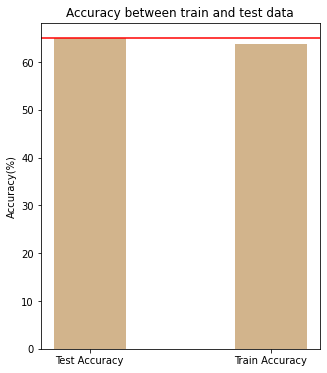

In [ ]:
############################################### TRAINING PHASE ################################################
#use 60-90-10 data  split(train, validation -test)
lrT1 = 0.001
labdT1 = 0                                      # if you want do L2 regualrization, type > 0, otherwise it will be gradient descent without L2.
layersT1 = [xtrain_sc.shape[1], 1]
simulationT1 = 10000
Trainvault1 = SPL(lr = lrT1, labd = labdT1, layers =layersT1, X = xtrain_sc, Y = Ytrain, simulation=simulationT1, valid = False, W = 0)


################################################# VALIDATION PHASE  #########################################

TrainWmin1 = minimumcost(Trainvault1)
lrV1 = 0.01
labdV1 = 0.0001                             
layersV1 = [xvalid_sc.shape[1], 1]
simulationV1 = 10000
Validvault1 = SPL(lr = lrV1, labd = labdV1, layers =layersV1, X = xvalid_sc, Y = Yvalid, simulation=simulationV1, valid = True, W = TrainWmin1)

##################################################  TESTING PHASE   ##############################################

ValidWmin1 = minimumcost(Validvault1)
testpred1 = SPLPrediction(xtest_sc, Ytest, ValidWmin1)
trainpred1 = SPLPrediction(xtrain_sc, Ytrain, TrainWmin1)
print("The accuracy of the model at minimum cost value is: ", testpred1[0])
print("The accuracy of the model at minimum cost value is: ", trainpred1[0])

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred1[0], trainpred1[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred1[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

TEST-2

The accuracy of the testing data:  70.0
The accuracy of the training data:  66.05839416058394


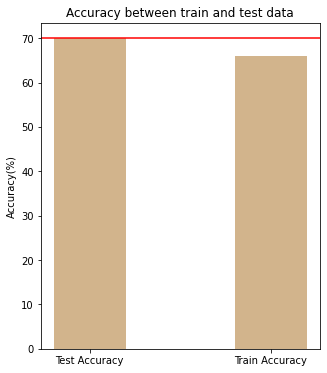

In [ ]:
############################################### TRAINING PHASE ################################################
#use 70-95-5 data  split(train, validation -test)
lrT2 = 0.1
labdT2 = 0                                      # if you want do L2 regualrization, type > 0, otherwise it will be gradient descent without L2.
layersT2 = [xtrain_sc.shape[1], 1]
simulationT2 = 10000
Trainvault2 = SPL(lr = lrT2, labd = labdT2, layers =layersT2, X = xtrain_sc, Y = Ytrain, simulation=simulationT2, valid = False, W = 0)


################################################# VALIDATION PHASE  #########################################

TrainWmin2 = minimumcost(Trainvault2)
lrV2 = 0.05
labdV2 = 0.00005                             
layersV2 = [xvalid_sc.shape[1], 1]
simulationV2 = 10000
Validvault2 = SPL(lr = lrV2, labd = labdV2, layers =layersV2, X = xvalid_sc, Y = Yvalid, simulation=simulationV2, valid = True, W = TrainWmin2)
##################################################  TESTING PHASE   ##############################################

ValidWmin2 = minimumcost(Validvault2)
testpred2 = SPLPrediction(xtest_sc, Ytest, ValidWmin2)
trainpred2 = SPLPrediction(xtrain_sc, Ytrain, TrainWmin2)
print("The accuracy of the testing data: ", testpred2[0])
print("The accuracy of the training data: ", trainpred2[0])

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred2[0], trainpred2[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred2[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

TEST-3

The accuracy of the model at minimum cost value is:  70.0
The accuracy of the model at minimum cost value is:  66.36636636636636


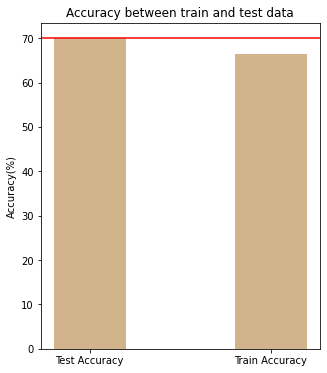

In [ ]:

############################################## TRAINING PHASE ################################################
#use 85-10-5 data  split(train, validation -test)
lrT3 = 0.001
labdT3 = 0                                      # if you want do L2 regualrization, type > 0, otherwise it will be gradient descent without L2.
layersT3 = [xtrain_sc.shape[1], 1]
simulationT3 = 10000
Trainvault3 = SPL(lr = lrT3, labd = labdT3, layers =layersT3, X = xtrain_sc, Y = Ytrain, simulation=simulationT3, valid = False, W = 0)


################################################# VALIDATION PHASE  #########################################

TrainWmin3 = minimumcost(Trainvault3)
lrV3 = 0.18
labdV3 = 0.0005                             
layersV3 = [xvalid_sc.shape[1], 1]
simulationV3 = 5000
Validvault3 = SPL(lr = lrV3, labd = labdV3, layers =layersV3, X = xvalid_sc, Y = Yvalid, simulation=simulationV3, valid = True, W = TrainWmin3)

##################################################  TESTING PHASE   ##############################################

ValidWmin3 = minimumcost(Validvault3)
testpred3 = SPLPrediction(xtest_sc, Ytest, ValidWmin3)
trainpred3 = SPLPrediction(xtrain_sc, Ytrain, TrainWmin3)
print("The accuracy of the model at minimum cost value is: ", testpred3[0])
print("The accuracy of the model at minimum cost value is: ", trainpred3[0])

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred3[0], trainpred3[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred3[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [ ]:
testpred3

[70.0, 82.35294117647058, 30.0]

In [ ]:
testpred1

[65.0, 78.7878787878788, 35.0]

In [ ]:
testpred2

[70.0, 82.35294117647058, 30.0]